In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib widget

In [2]:
file_dir = "images\\PyTorch_t1010_100858_mFalse_ep80_bs64_nm30_mp0.02_mi4\\logs\\"
files_list = [f"stats_{i}.csv" for i in range(4, 81, 4)]

In [17]:
smooth = 500

In [18]:
df_list = []
for ind, file in enumerate(files_list):
    df_list.append(pd.read_csv(file_dir + file))
    df_list[ind]["smoothed_g_loss"] = df_list[ind].g_loss.rolling(smooth, center=True).mean()
    df_list[ind]["smoothed_d_loss"] = df_list[ind].d_loss.rolling(smooth, center=True).mean()

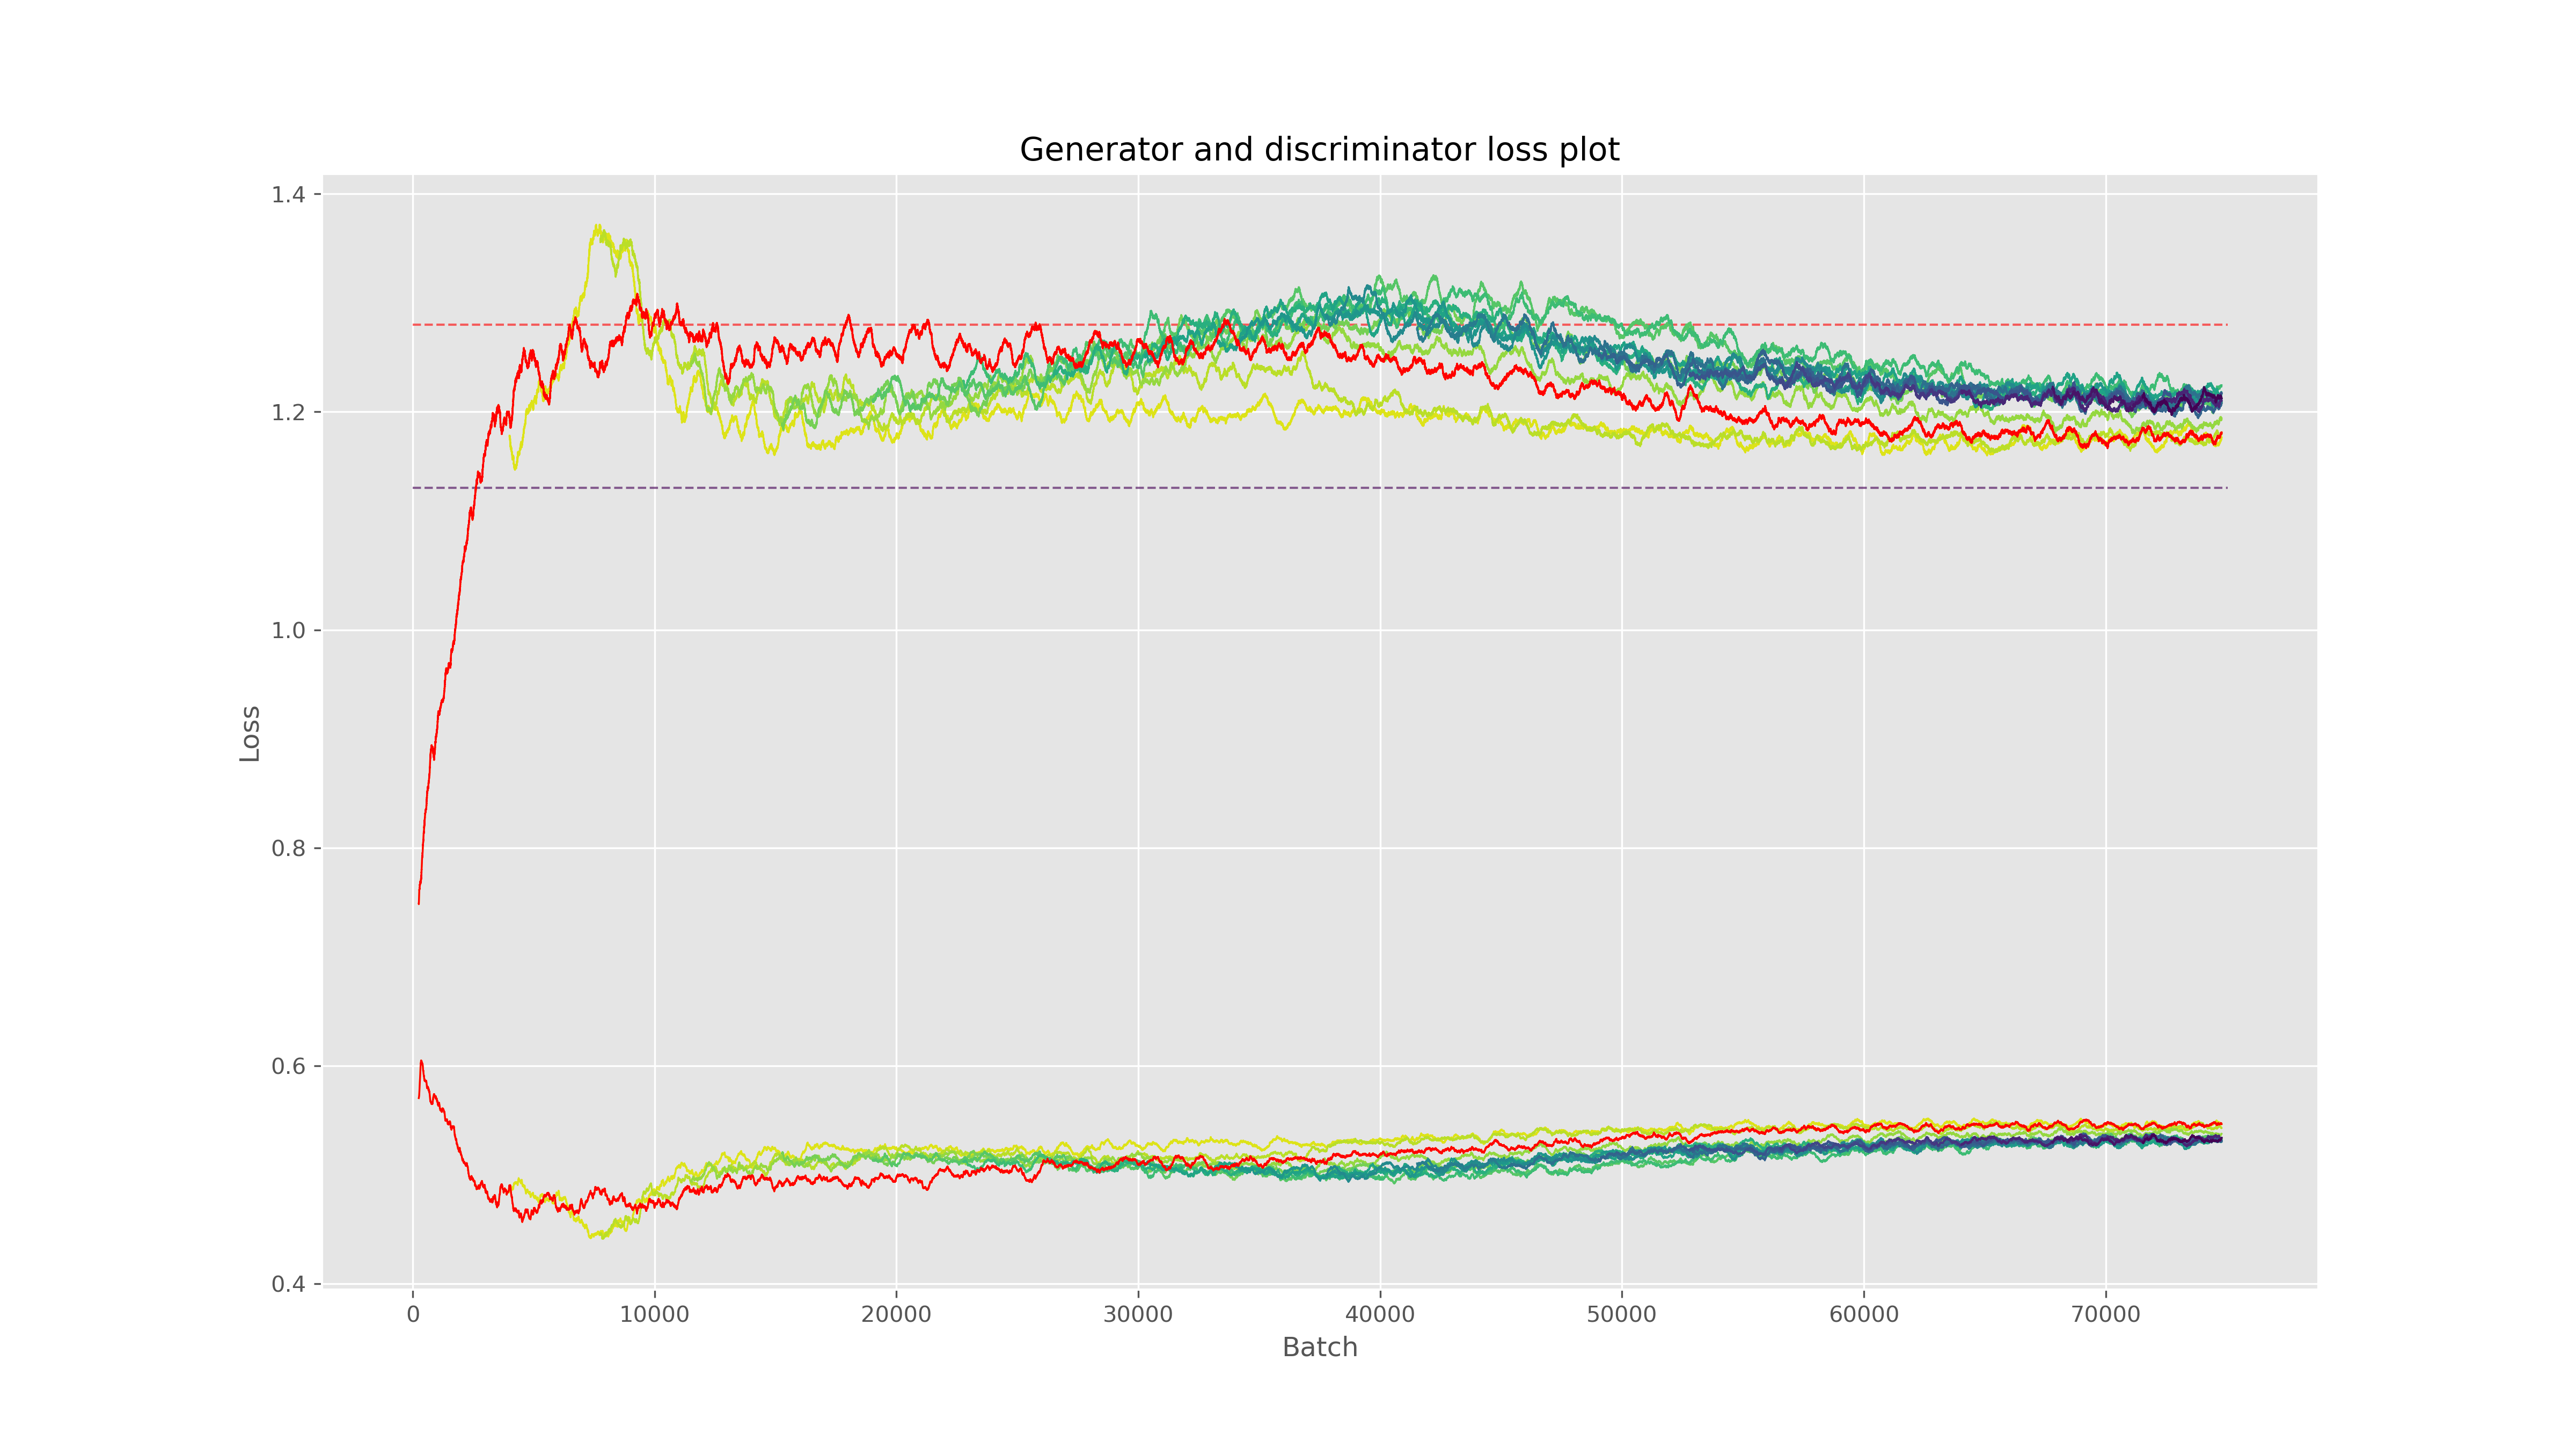

In [25]:
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams['figure.dpi'] =  300
plt.style.use("ggplot")

virdis_colors = np.flip(cm.get_cmap("viridis", 20)(np.linspace(0, 1, 20)), axis=0)
cividis_colors = cm.get_cmap("cividis", 20)(np.linspace(0, 1, 20))


fig, ax = plt.subplots()
for ind, df in enumerate(df_list):
    ax.plot(df.batch, df.smoothed_g_loss, label=f"Generator {(ind + 1) * 4}", lw=0.8, c=virdis_colors[ind])
    ax.plot(df.batch, df.smoothed_d_loss, label=f"Discriminator {(ind + 1) * 4}", lw=0.8, c=virdis_colors[ind])
ax.plot(df_list[0].batch, df_list[0].smoothed_g_loss, label=f"Generator {(ind + 1) * 4}", lw=0.8, c="red")
ax.plot(df_list[0].batch, df_list[0].smoothed_d_loss, label=f"Discriminator {(ind + 1) * 4}", lw=0.8, c="red")
ax.hlines(y=1.13, 
          xmin=0, 
          xmax=75040,
          color=virdis_colors[-1], alpha=0.6,
          linestyle='--', linewidth=1
         )
ax.hlines(y=1.28, 
          xmin=0, 
          xmax=75040,
          color="red", alpha=0.6,
          linestyle='--', linewidth=1
         )
ax.set_title("Generator and discriminator loss plot")
ax.set_ylabel("Loss")
ax.set_xlabel("Batch")
None